# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps_df = pd.read_csv('googleplaystore.csv')
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

# Clean Data

In [3]:
# 1. Remove rows with invalid ratings (Rating > 5 is impossible)
apps_df = apps_df[apps_df['Rating'] <= 5]

In [4]:
# 2. Clean 'Installs': Remove '+' and ',' and convert to numeric
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '').str.replace(',', '')
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'])

In [5]:
# 3. Clean 'Price': Remove '$' and convert to numeric
apps_df['Price'] = apps_df['Price'].str.replace('$', '')
apps_df['Price'] = pd.to_numeric(apps_df['Price'])

In [6]:
# 4. Clean 'Reviews': Convert to numeric
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'])

In [7]:
# 5. Clean 'Size': Standardize to MB
def clean_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'Varies with device' in size:
        return np.nan
    else:
        return np.nan

apps_df['Size'] = apps_df['Size'].apply(clean_size)

In [8]:
# 6. Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

In [9]:
# 7. Remove Duplicates
apps_df.drop_duplicates(inplace=True)

In [10]:
print("Data Cleaning Complete.")
print(f"Remaining rows: {apps_df.shape[0]}")
print(f"Missing values in Rating: {apps_df['Rating'].isnull().sum()}")

Data Cleaning Complete.
Remaining rows: 8892
Missing values in Rating: 0


In [11]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [12]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8892 non-null   object        
 1   Category        8892 non-null   object        
 2   Rating          8892 non-null   float64       
 3   Reviews         8892 non-null   int64         
 4   Size            7424 non-null   float64       
 5   Installs        8892 non-null   int64         
 6   Type            8892 non-null   object        
 7   Price           8892 non-null   float64       
 8   Content Rating  8892 non-null   object        
 9   Genres          8892 non-null   object        
 10  Last Updated    8892 non-null   datetime64[ns]
 11  Current Ver     8888 non-null   object        
 12  Android Ver     8890 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 972.6+ KB


In [13]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
# Save the cleaned dataframes to new CSV files
apps_df.to_csv('cleaned_googleplaystore.csv', index=False)
reviews_df.to_csv('cleaned_googleplaystore_user_reviews.csv', index=False)

print("Data cleaning complete.")
print("Files saved: 'cleaned_googleplaystore.csv' and 'cleaned_googleplaystore_user_reviews.csv'")
print(f"Total Apps: {len(apps_df)}")
print(f"Total Reviews: {len(reviews_df)}")

Data cleaning complete.
Files saved: 'cleaned_googleplaystore.csv' and 'cleaned_googleplaystore_user_reviews.csv'
Total Apps: 8892
Total Reviews: 64295


In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Statistics

In [16]:
# Select numeric columns
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
stats_df = apps_df[numeric_cols].describe()

# Calculate Range manually
range_vals = apps_df[numeric_cols].max() - apps_df[numeric_cols].min()
stats_df.loc['range'] = range_vals

# Calculate Sum for relevant columns
total_installs = apps_df['Installs'].sum()
total_reviews = apps_df['Reviews'].sum()

print("--- Descriptive Statistics ---")
print(stats_df)
print(f"\nTotal Installs across all apps: {total_installs:,.0f}")
print(f"Total Reviews processed: {total_reviews:,.0f}")

--- Descriptive Statistics ---
            Rating       Reviews         Size      Installs        Price
count  8892.000000  8.892000e+03  7424.000000  8.892000e+03  8892.000000
mean      4.187877  4.727764e+05    22.747273  1.648965e+07     0.963155
std       0.522377  2.905052e+06    23.435118  8.637600e+07    16.189341
min       1.000000  1.000000e+00     0.008301  1.000000e+00     0.000000
25%       4.000000  1.640000e+02     5.100000  1.000000e+04     0.000000
50%       4.300000  4.714500e+03    14.000000  5.000000e+05     0.000000
75%       4.500000  7.126675e+04    33.000000  5.000000e+06     0.000000
max       5.000000  7.815831e+07   100.000000  1.000000e+09   400.000000
range     4.000000  7.815830e+07    99.991699  1.000000e+09   400.000000

Total Installs across all apps: 146,625,951,338
Total Reviews processed: 4,203,927,457


# Information

In [17]:
unique_categories = apps_df['Category'].nunique()
type_counts = apps_df['Type'].value_counts()
common_content_rating = apps_df['Content Rating'].mode()[0]
top_5_installed = apps_df.sort_values(by='Installs', ascending=False).head(5)[['App', 'Installs']]
high_rated_count = apps_df[apps_df['Rating'] >= 4.0].shape[0]
avg_reviews_type = apps_df.groupby('Type')['Reviews'].mean()
avg_size_category = apps_df.groupby('Category')['Size'].mean().sort_values(ascending=False).head(5) # Showing top 5 for brevity
apps_2018 = apps_df[apps_df['Last Updated'].dt.year == 2018].shape[0]

print(f"Unique Categories: {unique_categories}")
print(f"Free vs Paid: \n{type_counts}")
print(f"Most Common Content Rating: {common_content_rating}")
print(f"Top 5 Installed Apps: \n{top_5_installed}")
print(f"Apps with Rating >= 4.0: {high_rated_count}")
print(f"Avg Reviews Free vs Paid: \n{avg_reviews_type}")
print(f"Apps updated in 2018: {apps_2018}")

Unique Categories: 33
Free vs Paid: 
Type
Free    8279
Paid     613
Name: count, dtype: int64
Most Common Content Rating: Everyone
Top 5 Installed Apps: 
                                           App    Installs
382   Messenger – Text and Video Chat for Free  1000000000
3454                              Google Drive  1000000000
2545                                 Instagram  1000000000
3234                                    Google  1000000000
3909                                 Instagram  1000000000
Apps with Rating >= 4.0: 6947
Avg Reviews Free vs Paid: 
Type
Free    506682.471675
Paid     14850.365416
Name: Reviews, dtype: float64
Apps updated in 2018: 6099


Text(0.5, 0, 'Size (MB)')

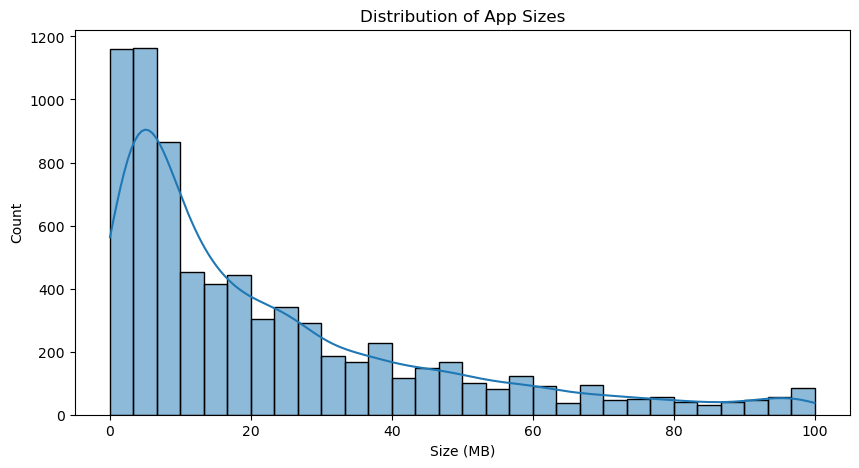

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Size'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')

In [19]:
corr_installs_rating = apps_df['Installs'].corr(apps_df['Rating'])

top_rated_categories = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

paid_apps = apps_df[apps_df['Type'] == 'Paid']
price_corr = paid_apps['Price'].corr(paid_apps['Rating'])

genres_1m = apps_df[apps_df['Installs'] > 1000000]['Genres'].value_counts().head(5)

max_date = apps_df['Last Updated'].max()
apps_df['Days_Since_Update'] = (max_date - apps_df['Last Updated']).dt.days
avg_days_since_update = apps_df['Days_Since_Update'].mean()

top_reviewed = apps_df.sort_values(by='Reviews', ascending=False).head(5)[['App', 'Reviews', 'Rating']]

content_type_cross = pd.crosstab(apps_df['Content Rating'], apps_df['Type'])

print(f"Correlation Installs vs Rating: {corr_installs_rating}")
print(f"Top Rated Categories: \n{top_rated_categories}")
print(f"Correlation Price vs Rating (Paid): {price_corr}")
print(f"Top Genres (>1M Installs): \n{genres_1m}")
print(f"Avg Days Since Last Update (Proxy for frequency): {avg_days_since_update:.2f}")
print(f"Top Reviewed Apps: \n{top_reviewed}")
print(f"Content Rating vs Type: \n{content_type_cross}")

Correlation Installs vs Rating: 0.05088596249846884
Top Rated Categories: 
Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
Name: Rating, dtype: float64
Correlation Price vs Rating (Paid): -0.1126226541554837
Top Genres (>1M Installs): 
Genres
Tools            187
Action           182
Photography      161
Communication    146
Productivity     124
Name: count, dtype: int64
Avg Days Since Last Update (Proxy for frequency): 259.12
Top Reviewed Apps: 
                     App   Reviews  Rating
2544            Facebook  78158306     4.1
3943            Facebook  78128208     4.1
336   WhatsApp Messenger  69119316     4.4
3904  WhatsApp Messenger  69109672     4.4
2604           Instagram  66577446     4.5
Content Rating vs Type: 
Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         6575   520
Everyone 10+      328    32
Matur

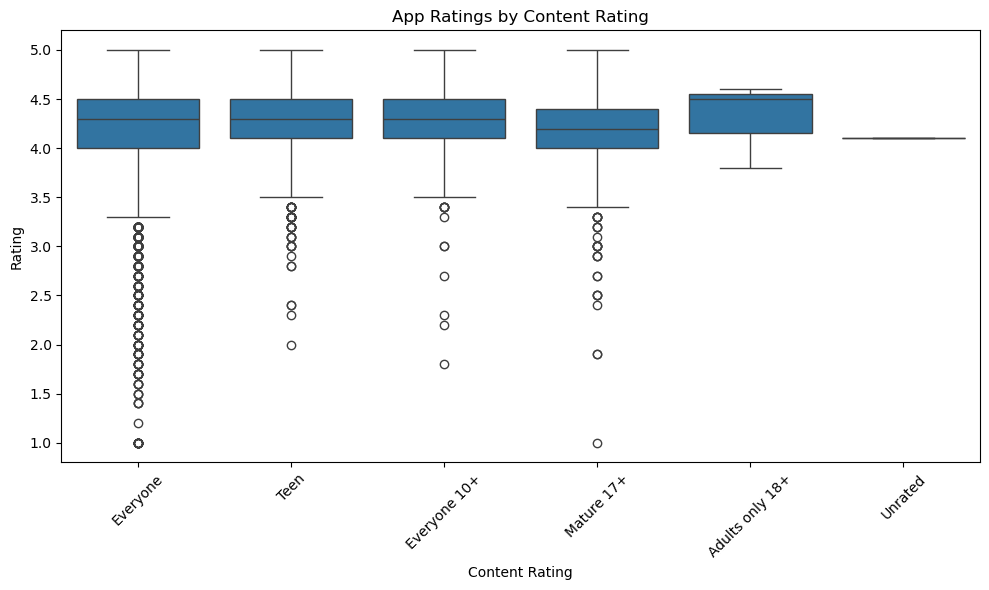

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content Rating', y='Rating', data=apps_df)
plt.title('App Ratings by Content Rating')
plt.xticks(rotation=45)
plt.tight_layout()

# Visuals

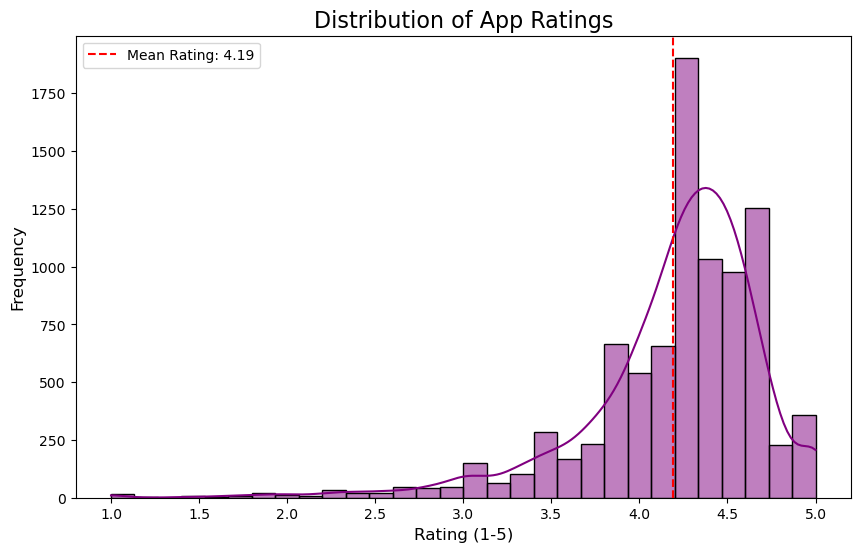

In [21]:
# --- VISUALIZATION 1: RATING DISTRIBUTION ---
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'].dropna(), kde=True, color='purple', bins=30)
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(apps_df['Rating'].mean(), color='red', linestyle='--', label=f'Mean Rating: {apps_df["Rating"].mean():.2f}')
plt.legend()
plt.show()

C:\Users\ruchi\AppData\Local\Temp\ipykernel_30700\1317609257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_installs.values, y=category_installs.index, palette='viridis')


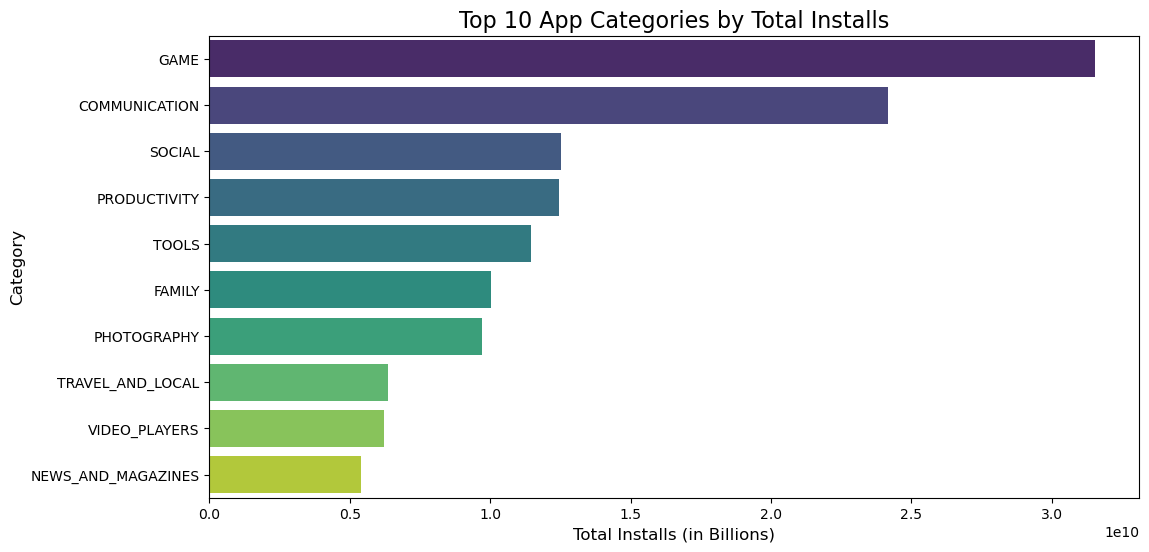

In [22]:
# --- VISUALIZATION 2: TOP CATEGORIES BY INSTALLS ---
# Group by Category and sum Installs
category_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_installs.values, y=category_installs.index, palette='viridis')
plt.title('Top 10 App Categories by Total Installs', fontsize=16)
plt.xlabel('Total Installs (in Billions)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

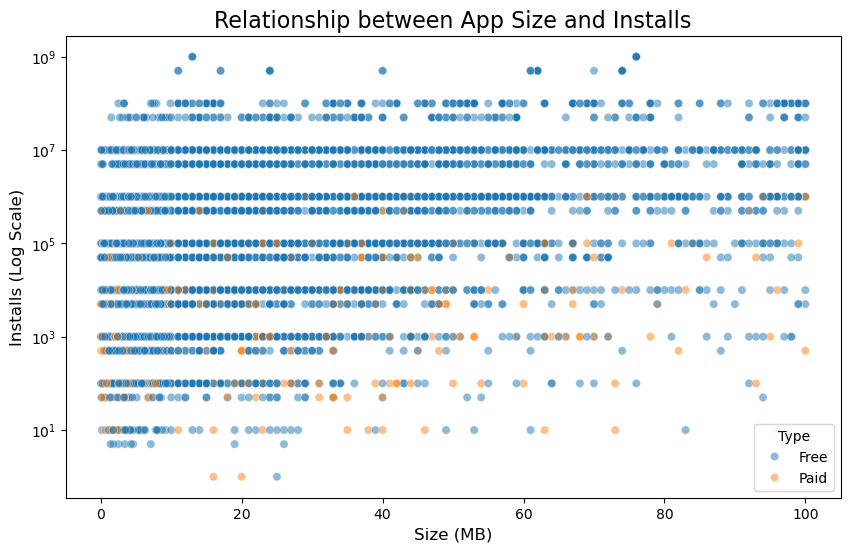

In [23]:
# --- VISUALIZATION 3: SIZE VS INSTALLS (Jointplot) ---
# We use a subset of data to avoid overcrowding the plot
subset_df = apps_df.dropna(subset=['Size', 'Installs'])

# Use log scale for Installs due to massive range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x='Size', y='Installs', alpha=0.5, hue='Type')
plt.yscale('log')
plt.title('Relationship between App Size and Installs', fontsize=16)
plt.xlabel('Size (MB)', fontsize=12)
plt.ylabel('Installs (Log Scale)', fontsize=12)
plt.show()

C:\Users\ruchi\AppData\Local\Temp\ipykernel_30700\854964752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Sentiment', palette='pastel', order=['Positive', 'Negative', 'Neutral'])


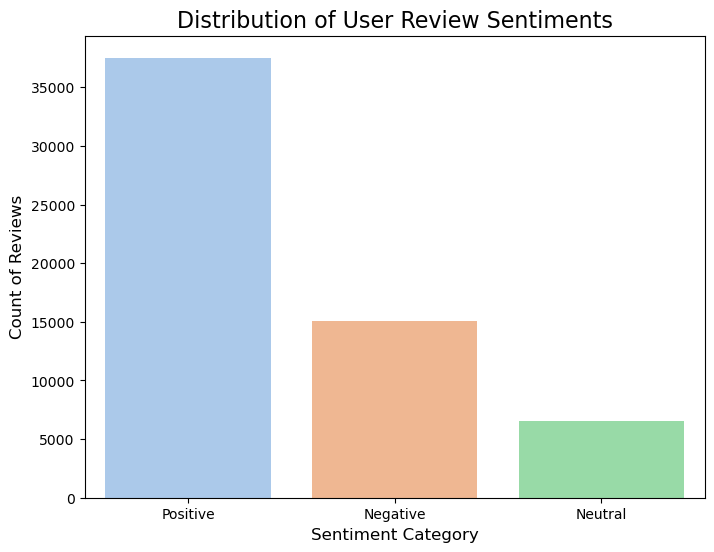

In [24]:
# --- VISUALIZATION 4: SENTIMENT DISTRIBUTION ---
# Merge apps and reviews
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

# Plot Sentiment Counts
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='Sentiment', palette='pastel', order=['Positive', 'Negative', 'Neutral'])
plt.title('Distribution of User Review Sentiments', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.show()

In [25]:
# Binning Installs
bins = [-1, 1000, 100000, 1000000, 10000000, 1000000000]
labels = ['<1k', '1k-100k', '100k-1M', '1M-10M', '>10M']
apps_df['Install_Category'] = pd.cut(apps_df['Installs'], bins=bins, labels=labels)
avg_rating_binned = apps_df.groupby('Install_Category')['Rating'].mean()

# 5. Genre vs Ratings
genre_ratings = apps_df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(5)

print(f"Avg Rating by Install Count: \n{avg_rating_binned}")
print(f"Top Rated Genres: \n{genre_ratings}")

Avg Rating by Install Count: 
Install_Category
<1k        4.198504
1k-100k    4.064513
100k-1M    4.207043
1M-10M     4.285675
>10M       4.372170
Name: Rating, dtype: float64
Top Rated Genres: 
Genres
Comics;Creativity             4.8
Board;Pretend Play            4.8
Health & Fitness;Education    4.7
Puzzle;Education              4.6
Adventure;Brain Games         4.6
Name: Rating, dtype: float64


C:\Users\ruchi\AppData\Local\Temp\ipykernel_30700\3996909863.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_binned = apps_df.groupby('Install_Category')['Rating'].mean()


Text(0, 0.5, 'Number of Updates')

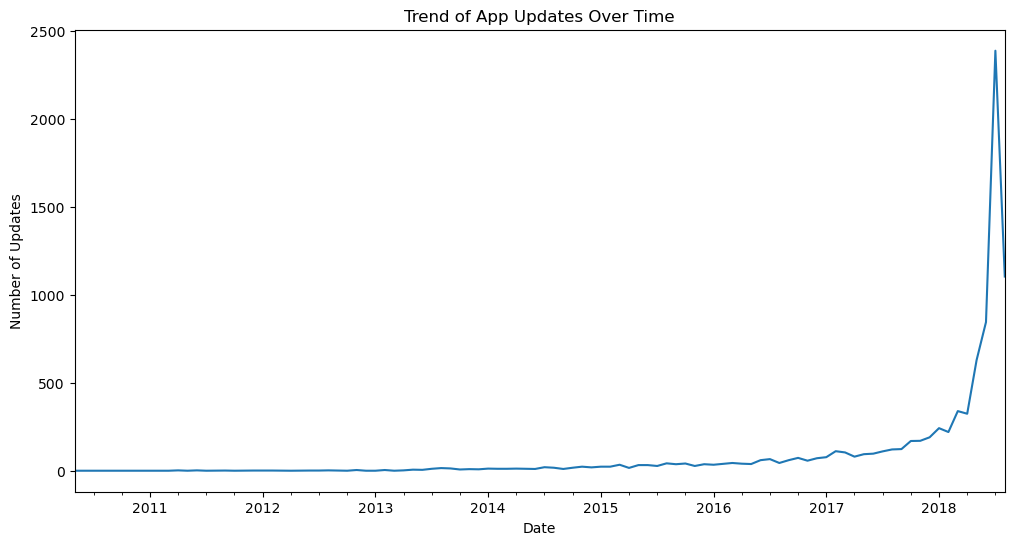

In [26]:
plt.figure(figsize=(12, 6))
updates_timeline = apps_df['Last Updated'].dt.to_period('M').value_counts().sort_index()
updates_timeline.plot()
plt.title('Trend of App Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Updates')

# Summary